In [1]:
from keras import layers, models

Using TensorFlow backend.


In [3]:
def ANN_models_func(Nin, Nh, Nout):
    x = layers.Input(shape=(Nin,))
    h = layers.Activation('relu')(layers.Dense(Nh)(x))
    y = layers.Activation('softmax')(layers.Dense(Nout)(h))
    model = models.Model(x, y)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    model.add(layers.Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    return model

In [4]:
class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = softmax(output(h))

        super().__init__(x, y)
        self.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])

In [5]:
class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])

In [6]:
import numpy as np
from keras import datasets  # mnist
from keras.utils import np_utils  # to_categorical

In [7]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)


In [12]:
def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_acc(history)
    plt.subplot(1, 2, 2)
    plot_loss(history)

    
def plot_loss_acc(history):
    plot_loss(history, '(a) Loss trajectory')
    plt.show()            
    plot_acc(history, '(b) Accracy trajectory')
    plt.show()
    
    
def plot_acc_loss(history):
    plot_acc(history, '(a) Accracy trajectory')
    plt.show()
    plot_loss(history, '(b) Loss trajectory')
    plt.show()       

In [13]:
def save_history_history(fname, history_history, fold=''):
    np.save(os.path.join(fold, fname), history_history)


def load_history_history(fname, fold=''):
    history_history = np.load(os.path.join(fold, fname)).item(0)
    return history_history

In [10]:
import matplotlib.pyplot as plt


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


In [11]:
def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


In [10]:
def main():
    Nin = 784
    Nh = 100
    number_of_class = 10
    Nout = number_of_class

    # model = ANN_models_func(Nin, Nh, Nout)
    # model = ANN_models_class(Nin, Nh, Nout)
    model = ANN_seq_class(Nin, Nh, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()

    ##############################################
    # Training
    ##############################################
    history = model.fit(X_train, Y_train, epochs=15, batch_size=100, validation_split=0.2)
    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performace_test)

    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 5s 102us/step - loss: 0.3985 - acc: 0.8907 - val_loss: 0.2169 - val_acc: 0.9394
Epoch 2/15
48000/48000 [==============================] - 2s 34us/step - loss: 0.1858 - acc: 0.9473 - val_loss: 0.1629 - val_acc: 0.9548
Epoch 3/15
48000/48000 [==============================] - 2s 33us/step - loss: 0.1362 - acc: 0.9616 - val_loss: 0.1320 - val_acc: 0.9615
Epoch 4/15
48000/48000 [==============================] - 2s 33us/step - loss: 0.1074 - acc: 0.9699 - val_loss: 0.1202 - val_acc: 0.9656
Epoch 5/15
48000/48000 [==============================] - 2s 32us/step - loss: 0.0888 - acc: 0.9746 - val_loss: 0.1091 - val_acc: 0.9681
Epoch 6/15
48000/48000 [==============================] - 2s 33us/step - loss: 0.0740 - acc: 0.9787 - val_loss: 0.1002 - val_acc: 0.9717
Epoch 7/15
48000/48000 [==============================] - 2s 32us/step - loss: 0.0631 - acc: 0.9819 - val_loss: 0.0973 - val_ac

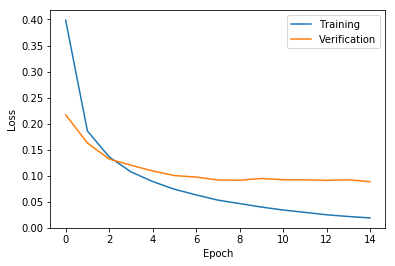

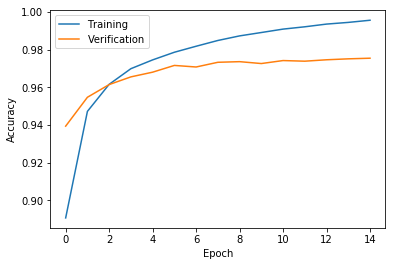

In [34]:
if __name__ == '__main__':
    main()


In [11]:
###############p90. 회귀 ANN 모델

In [11]:
class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = output(h)
        super().__init__(x,y)
        self.compile(loss='mse', optimizer='adam')

In [12]:
from sklearn import preprocessing

In [13]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return (X_train, y_train), (X_test, y_test)

In [13]:
def main():
    Nin = 13
    Nh = 5
    Nout = 1
    model = ANN(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()
    history = model.fit(X_train, y_train, epochs=100, batch_size = 100, validation_split=0.2, verbose=2)
    
    performance_test = model.evaluate(X_test, y_test, batch_size=100)
    print(performance_test)
    plot_loss(history)
    plt.show()

Train on 323 samples, validate on 81 samples
Epoch 1/100
 - 0s - loss: 561.8189 - val_loss: 631.3386
Epoch 2/100
 - 0s - loss: 559.9683 - val_loss: 629.2991
Epoch 3/100
 - 0s - loss: 558.0128 - val_loss: 627.1374
Epoch 4/100
 - 0s - loss: 555.9458 - val_loss: 624.9171
Epoch 5/100
 - 0s - loss: 553.8473 - val_loss: 622.6412
Epoch 6/100
 - 0s - loss: 551.7017 - val_loss: 620.2795
Epoch 7/100
 - 0s - loss: 549.5056 - val_loss: 617.8658
Epoch 8/100
 - 0s - loss: 547.2700 - val_loss: 615.4124
Epoch 9/100
 - 0s - loss: 544.9658 - val_loss: 612.9025
Epoch 10/100
 - 0s - loss: 542.5979 - val_loss: 610.3292
Epoch 11/100
 - 0s - loss: 540.1584 - val_loss: 607.6727
Epoch 12/100
 - 0s - loss: 537.6360 - val_loss: 604.9661
Epoch 13/100
 - 0s - loss: 534.9898 - val_loss: 602.2267
Epoch 14/100
 - 0s - loss: 532.3349 - val_loss: 599.4005
Epoch 15/100
 - 0s - loss: 529.6415 - val_loss: 596.5141
Epoch 16/100
 - 0s - loss: 526.8791 - val_loss: 593.6062
Epoch 17/100
 - 0s - loss: 524.1045 - val_loss: 590.

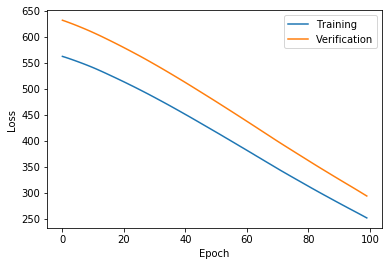

In [39]:
if __name__ == '__main__':
    main()

In [14]:
Nin = 784
Nh_l = [100,50]
number_of_class = 10
Nout = number_of_class 

In [14]:
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Nout):
        super().__init__()
        self.add(layers.Dense(Nh_l[0], activation='relu', input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dropout(0.2))
        self.add(layers.Dense(Nh_l[1], activation='relu', name='Hidden-2'))
        self.add(layers.Dropout(0.2))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
import numpy as np
from keras import datasets
from keras.utils import np_utils

In [16]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
L, W, H = X_train.shape
X_train = X_train.reshape(-1, W*H)
X_test = X_test.reshape(-1, W*H)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [62]:
model = DNN(Nin, Nh_l, Nout)
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 60us/step - loss: 0.5264 - acc: 0.8409 - val_loss: 0.1872 - val_acc: 0.9444
Epoch 2/10
48000/48000 [==============================] - 3s 52us/step - loss: 0.2335 - acc: 0.9317 - val_loss: 0.1400 - val_acc: 0.9597
Epoch 3/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.1798 - acc: 0.9474 - val_loss: 0.1121 - val_acc: 0.9663
Epoch 4/10
48000/48000 [==============================] - 2s 43us/step - loss: 0.1516 - acc: 0.9553 - val_loss: 0.1067 - val_acc: 0.9681
Epoch 5/10
48000/48000 [==============================] - 2s 41us/step - loss: 0.1317 - acc: 0.9614 - val_loss: 0.1033 - val_acc: 0.9702
Epoch 6/10
48000/48000 [==============================] - 2s 40us/step - loss: 0.1144 - acc: 0.9658 - val_loss: 0.1044 - val_acc: 0.9693
Epoch 7/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.1085 - acc: 0.9684 - val_loss: 0.0923 - val_acc

In [18]:
performance_test = model.evaluate(X_test, y_test, batch_size=100)

NameError: name 'model' is not defined

In [19]:
print('Test Loss and Accuracy -> ', performance_test)

NameError: name 'performance_test' is not defined

In [20]:
##########CIFAR-10

In [17]:
import numpy as np
from keras import datasets
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [18]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)
    L,W,H,C = X_train.shape
    X_train = X_train.reshape(-1, W*H*C)
    X_test = X_test.reshape(-1, W*H*C)
    
    X_train = X_train / 255
    X_test = X_test / 255
    return (X_train, Y_train), (X_test, Y_test)
    

In [19]:
from keras import layers, models

In [24]:
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Pd_l, Nout):
        super().__init__()
        
        self.add(layers.Dense(Nh_l[0], activation = 'relu', input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dropout(Pd_l[0]))
        self.add(layers.Dense(Nh_l[1], activation='relu', input_shape=(Nin,), name='Hidden-2'))
        self.add(layers.Dropout(Pd_l[1]))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        

In [25]:
def main():
    Nh_l = [100, 50]
    Pd_l = [0.02, 0.5]
    number_of_class = 10
    Nout = number_of_class
    
    (X_train, Y_train), (X_test, Y_test) = Data_func()
    model = DNN(X_train.shape[1], Nh_l, Pd_l, Nout)
    history = model.fit(X_train, Y_train, epochs = 20, batch_size = 100, validation_split = 0.2)
    performance_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy -> ', performance_test)
    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()
    

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 29s 726us/step - loss: 2.1225 - acc: 0.2087 - val_loss: 1.9459 - val_acc: 0.2683
Epoch 2/20
40000/40000 [==============================] - 4s 88us/step - loss: 1.9518 - acc: 0.2837 - val_loss: 1.8589 - val_acc: 0.3174
Epoch 3/20
40000/40000 [==============================] - 4s 88us/step - loss: 1.8995 - acc: 0.3073 - val_loss: 1.8134 - val_acc: 0.3443
Epoch 4/20
40000/40000 [==============================] - 4s 92us/step - loss: 1.8677 - acc: 0.3199 - val_loss: 1.7871 - val_acc: 0.3510
Epoch 5/20
40000/40000 [==============================] - 4s 91us/step - loss: 1.8472 - acc: 0.3310 - val_loss: 1.7924 - val_acc: 0.3490
Epoch 6/20
40000/40000 [==============================] - 4s 91us/step - loss: 1.8271 - acc: 0.3374 - val_loss: 1.7800 - val_acc: 0.3523
Epoch 7/20
40000/40000 [==============================] - 4s 91us/step - loss: 1.8205 - acc: 0.3372 - val_loss: 1.7800 - val_a

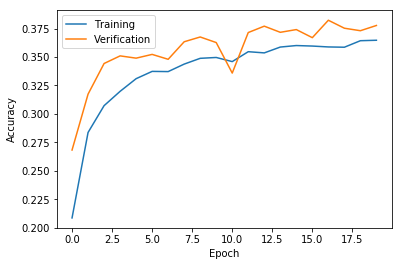

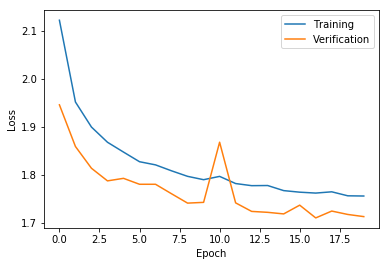

In [130]:
if __name__ == '__main__':
    main()

In [131]:
#######CNN

In [20]:
import keras

In [21]:
from keras import models, layers

In [22]:
from keras import backend
from keras import datasets

In [23]:
class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
        self.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))

        self.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer='rmsprop',
                      metrics=['accuracy'])

In [24]:
class DATA():
    def __init__(self):
        num_classes = 10
        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
        img_rows, img_cols = x_train.shape[1:]
        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)
        
        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255
        
        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)
        
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test
        

In [25]:
def main():
    batch_size = 128
    epochs = 10

    data = DATA()
    model = CNN(data.input_shape, data.num_classes)

    history = model.fit(data.x_train, data.y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.2)

    score = model.evaluate(data.x_test, data.y_test)
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 170us/step - loss: 0.2493 - acc: 0.9243 - val_loss: 0.0680 - val_acc: 0.9792
Epoch 2/10
48000/48000 [==============================] - 7s 150us/step - loss: 0.0875 - acc: 0.9739 - val_loss: 0.0556 - val_acc: 0.9839
Epoch 3/10
48000/48000 [==============================] - 7s 150us/step - loss: 0.0666 - acc: 0.9803 - val_loss: 0.0460 - val_acc: 0.9867
Epoch 4/10
48000/48000 [==============================] - 7s 150us/step - loss: 0.0549 - acc: 0.9836 - val_loss: 0.0476 - val_acc: 0.9862
Epoch 5/10
48000/48000 [==============================] - 7s 149us/step - loss: 0.0491 - acc: 0.9854 - val_loss: 0.0449 - val_acc: 0.9875
Epoch 6/10
48000/48000 [==============================] - 7s 149us/step - loss: 0.0440 - acc: 0.9871 - val_loss: 0.0486 - val_acc: 0.9877
Epoch 7/10
48000/48000 [==============================] - 7s 149us/step - loss: 0.0399 - acc: 0.9886 - val_loss: 0.0372 - 

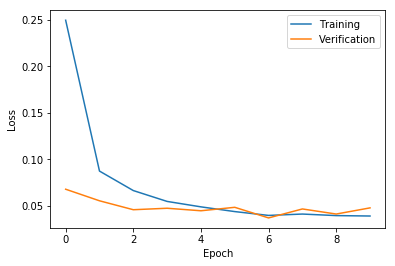

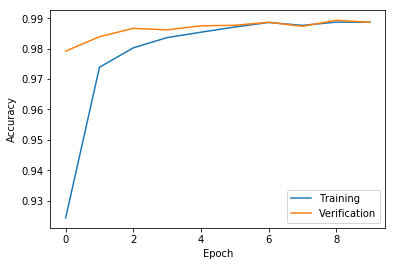

In [34]:
if __name__=='__main__':
    main()

In [35]:
###################CNN_Color

In [26]:
from sklearn import model_selection, metrics
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import os

In [27]:
from keras import backend as K
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [28]:
##학습결과 저장 함수
import datetime
import uuid
import os


def unique_filename(type='uuid'):
    if type == 'datetime':
        filename = datetime.datetime.now().strftime("%y%m%d_%H%M%S")
    else:  # type == "uuid"
        filename = str(uuid.uuid4())
    return filename


def makenewfold(prefix='output_', type='datetime'):
    suffix = unique_filename('datetime')
    foldname = 'output_' + suffix
    os.makedirs(foldname)
    return foldname

In [29]:
##학습 곡선 그리는 함수
import numpy as np
import matplotlib.pyplot as plt
import os

import matplotlib

def save_history_history(fname, history_history, fold=''):
    np.save(os.path.join(fold, fname), history_history)


def load_history_history(fname, fold=''):
    history_history = np.load(os.path.join(fold, fname)).item(0)
    return history_history


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_acc(history)
    plt.subplot(1, 2, 2)
    plot_loss(history)

    
def plot_loss_acc(history):
    plot_loss(history, '(a) Loss trajectory')
    plt.show()            
    plot_acc(history, '(b) Accracy trajectory')
    plt.show()
    
    
def plot_acc_loss(history):
    plot_acc(history, '(a) Accracy trajectory')
    plt.show()
    plot_loss(history, '(b) Loss trajectory')
    plt.show()            

In [30]:
class CNN(Model):
    def __init__(model, nb_classes, in_shape=None):
        super().__init__()
        model.nb_classes = nb_classes
        model.in_shape = in_shape
        model.build_model()
        super().__init__(model.x, model.y)
        model.compile()
        
    def build_model(model):
        nb_classes = model.nb_classes
        in_shape = model.in_shape

        x = Input(in_shape)

        h = Conv2D(32, kernel_size=(3, 3), activation='relu',
                   input_shape=in_shape)(x)
        h = Conv2D(64, (3, 3), activation='relu')(h)
        h = MaxPooling2D(pool_size=(2, 2))(h)
        h = Dropout(0.25)(h)
        h = Flatten()(h)
        z_cl = h

        h = Dense(128, activation='relu')(h)
        h = Dropout(0.5)(h)
        z_fl = h

        y = Dense(nb_classes, activation='softmax', name='preds')(h)

        model.cl_part = Model(x, z_cl)
        model.fl_part = Model(x, z_fl)

        model.x, model.y = x, y

    def compile(model):
        Model.compile(model, loss='categorical_crossentropy',
                      optimizer='adadelta', metrics=['accuracy'])

In [31]:
class DataSet:
    def __init__(self, X, y, nb_classes, scaling=True, test_size=0.2, random_state=0):
        """
        X is originally vector. Hence, it will be transformed
        to 2D images with a channel (i.e, 3D).
        """
        self.X = X
        self.add_channels()

        X = self.X
        # the data, shuffled and split between train and test sets
        X_train, X_test, y_train, y_test = model_selection.train_test_split(
            X, y, test_size=0.2, random_state=random_state)

        print(X_train.shape, y_train.shape)

        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')

        if scaling:
            # scaling to have (0, 1) for each feature (each pixel)
            scaler = MinMaxScaler()
            n = X_train.shape[0]
            X_train = scaler.fit_transform(
                X_train.reshape(n, -1)).reshape(X_train.shape)
            n = X_test.shape[0]
            X_test = scaler.transform(
                X_test.reshape(n, -1)).reshape(X_test.shape)
            self.scaler = scaler

        print('X_train shape:', X_train.shape)
        print(X_train.shape[0], 'train samples')
        print(X_test.shape[0], 'test samples')

        # convert class vectors to binary class matrices
        Y_train = np_utils.to_categorical(y_train, nb_classes)
        Y_test = np_utils.to_categorical(y_test, nb_classes)

        self.X_train, self.X_test = X_train, X_test
        self.Y_train, self.Y_test = Y_train, Y_test
        self.y_train, self.y_test = y_train, y_test
        # self.input_shape = input_shape

    def add_channels(self):
        X = self.X

        if len(X.shape) == 3:
            N, img_rows, img_cols = X.shape

            if K.image_dim_ordering() == 'th':
                X = X.reshape(X.shape[0], 1, img_rows, img_cols)
                input_shape = (1, img_rows, img_cols)
            else:
                X = X.reshape(X.shape[0], img_rows, img_cols, 1)
                input_shape = (img_rows, img_cols, 1)
        else:
            input_shape = X.shape[1:]  # channel is already included.

        self.X = X
        self.input_shape = input_shape

In [32]:
class Machine():
    def __init__(self, X, y, nb_classes=2, fig=True):
        self.nb_classes = nb_classes
        self.set_data(X, y)
        self.set_model()
        self.fig = fig

    def set_data(self, X, y):
        nb_classes = self.nb_classes
        self.data = DataSet(X, y, nb_classes)
        print('data.input_shape', self.data.input_shape)

    def set_model(self):
        nb_classes = self.nb_classes
        data = self.data
        self.model = CNN(nb_classes=nb_classes, in_shape=data.input_shape)
       
    def fit(self, epochs=10, batch_size=128, verbose=1):
        data = self.data
        model = self.model

        history = model.fit(data.X_train, data.Y_train, batch_size=batch_size, epochs=epochs,
                            verbose=verbose, validation_data=(data.X_test, data.Y_test))
        return history

    def run(self, epochs=10, batch_size=128, verbose=1):
        data = self.data
        model = self.model
        fig = self.fig

        history = self.fit(epochs=epochs,
                           batch_size=batch_size, verbose=verbose)

        score = model.evaluate(data.X_test, data.Y_test, verbose=0)

        print('Confusion matrix')
        Y_test_pred = model.predict(data.X_test, verbose=0)
        y_test_pred = np.argmax(Y_test_pred, axis=1)
        print(metrics.confusion_matrix(data.y_test, y_test_pred))

        print('Test score:', score[0])
        print('Test accuracy:', score[1])

        # Save results
        suffix = unique_filename('datatime')
        foldname = 'output_' + suffix
        os.makedirs(foldname)
        save_history_history(
            'history_history.npy', history.history, fold=foldname)
        model.save_weights(os.path.join(foldname, 'dl_model.h5'))
        print('Output results are saved in', foldname)

        if fig:
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plot_acc(history)
            plt.subplot(1, 2, 2)
            plot_loss(history)
            plt.show()

        self.history = history

        return foldname

In [33]:
class Machinee(Machine):
    def __init__(self):
        (X, y), (x_test, y_test) = datasets.cifar10.load_data()
        super().__init__(X, y, nb_classes=10)


def main():
    m = Machinee()
    m.run()


(40000, 32, 32, 3) (40000, 1)
X_train shape: (40000, 32, 32, 3)
40000 train samples
10000 test samples
data.input_shape (32, 32, 3)
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 9s 235us/step - loss: 1.9762 - acc: 0.2777 - val_loss: 1.5860 - val_acc: 0.4164
Epoch 2/10
40000/40000 [==============================] - 8s 212us/step - loss: 1.5455 - acc: 0.4437 - val_loss: 1.3415 - val_acc: 0.5148
Epoch 3/10
40000/40000 [==============================] - 8s 212us/step - loss: 1.3472 - acc: 0.5201 - val_loss: 1.1780 - val_acc: 0.5825
Epoch 4/10
40000/40000 [==============================] - 8s 212us/step - loss: 1.2080 - acc: 0.5765 - val_loss: 1.0975 - val_acc: 0.6071
Epoch 5/10
40000/40000 [==============================] - 8s 211us/step - loss: 1.1004 - acc: 0.6139 - val_loss: 1.0319 - val_acc: 0.6356
Epoch 6/10
40000/40000 [==============================] - 8s 212us/step - loss: 1.0257 - acc: 0.6442 - val_loss: 0.9667 - val_ac

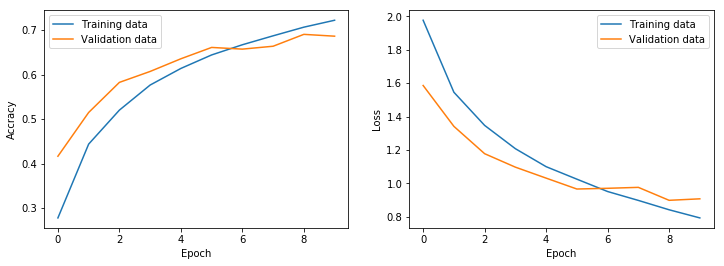

In [58]:
if __name__ == '__main__':
    main()

In [ ]:
###RNN 

In [7]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.datasets import imdb
from keras import layers, models

In [2]:
class Data:
    def __init__(self, max_features=20000, maxlen=80):
        (x_train, y_train), (x_test, y_test) = imdb.load_data(
            num_words=max_features)
        x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
        x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test

In [3]:
class RNN_LSTM(models.Model):
    def __init__(self, max_features, maxlen):
        x = layers.Input((maxlen,))
        h = layers.Embedding(max_features, 128)(x)
        h = layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2)(h)
        y = layers.Dense(1, activation='sigmoid')(h)
        super().__init__(x, y)

        # try using different optimizers and different optimizer configs
        self.compile(loss='binary_crossentropy',
                     optimizer='adam', metrics=['accuracy'])

In [4]:
class Machine:
    def __init__(self,
                 max_features=20000,
                 maxlen=80):
        self.data = Data(max_features, maxlen)
        self.model = RNN_LSTM(max_features, maxlen)

    def run(self, epochs=3, batch_size=32):
        data = self.data
        model = self.model
        print('Training stage')
        print('==============')
        model.fit(data.x_train, data.y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(data.x_test, data.y_test))

        score, acc = model.evaluate(data.x_test, data.y_test,
                                    batch_size=batch_size)
        print('Test performance: accuracy={0}, loss={1}'.format(acc, score))

In [5]:
def main():
    m = Machine()
    m.run()

In [6]:
if __name__ == '__main__':
    main()

17465344/17464789 [==============================] - 12s 1us/step
Training stage
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 182s 7ms/step - loss: 0.4601 - acc: 0.7823 - val_loss: 0.4041 - val_acc: 0.8183
Epoch 2/3
25000/25000 [==============================] - 168s 7ms/step - loss: 0.3000 - acc: 0.8764 - val_loss: 0.3720 - val_acc: 0.8362
Epoch 3/3
25000/25000 [==============================] - 40s 2ms/step
Test performance: accuracy=0.83064, loss=0.4048199745941162


In [ ]:
###COLOR RNN

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
from sklearn import model_selection
from keras import models, layers

In [18]:
def main():
    machine = Machine()
    machine.run(epochs=400)

In [59]:
class Machine():
    def __init__(self):
        self.data = Dataset()
        shape = self.data.X.shape[1:]
        self.model = rnn_model(shape)
    
    def run(self, epochs=400):
        d = self.data
        X_train, X_test, y_train, y_test = d.X_train, d.X_test, d.y_train, d.y_test
        X, y = d.X, d.y
        m = self.model
        h = m.fit(X_train, y_train, epochs=epochs, validation_data=[X_test, y_test], verbose=0)
        
        plot_loss(h)
        plt.title('History of training')
        plt.show()
        
        yp = m.predict(X_test)
        print('Loss: ', m.evaluate(X_test, y_test))
        plt.plot(yp, label='Origial')
        plt.plot(y_test, label='Prediction')
        plt.legend(loc=0)
        plt.title('Validation Results')
        plt.show()
        
        yp = m.predict(X_test).reshape(-1)
        print('Loss: ', m.evaluate(X_test, y_test))
        print(yp.shape, y_test.shape)
        
        df = pd.DataFrame()
        df['Sample'] = list(range(len(y_test))) * 2
        df['Normalized #Passengers'] = np.concatenate([y_test, yp], axis=0)
        df['Type'] = ['Original'] * len(y_test) + ['Prediction'] * len(yp)
        
        plt.figure(figsize=(7, 5))
        sns.barplot(x="Sample", y="Normalized #Passengers", 
                    hue="Type", data=df)
        plt.ylabel('Normalized #Passengers')
        plt.show()
        
        yp = m.predict(X)

        plt.plot(yp, label='Origial')
        plt.plot(y, label='Prediction')
        plt.legend(loc=0)
        plt.title('All Results')
        plt.show()
    
   

In [60]:
 def rnn_model(shape):
        m_x = layers.Input(shape=shape) #X.shape[1:]
        m_h = layers.LSTM(10)(m_x)
        m_y = layers.Dense(1)(m_h)
        m = models.Model(m_x, m_y)
    
        m.compile('adam', 'mean_squared_error')
    
        m.summary()
    
        return m
        

In [61]:
class Dataset:
    def __init__(self, fname='international-airline-passengers.csv', D=12):
        data_dn = load_data(fname=fname)
        X, y = get_Xy(data_dn, D=D)
        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)  
        
        self.X, self.y = X, y
        self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test 

In [62]:
def load_data(fname='international-airline-passengers.csv'):
    dataset = pd.read_csv(fname, usecols=[1], engine='python', skipfooter=3)
    data = dataset.values.reshape(-1)
    plt.plot(data)
    plt.xlabel('Time'); plt.ylabel('#Passengers')
    plt.title('Original Data')
    plt.show()

    # data normalize
    data_dn = (data - np.mean(data)) / np.std(data) / 5
    plt.plot(data_dn)
    plt.xlabel('Time'); plt.ylabel('Normalized #Passengers')
    plt.title('Normalized data by $E[]$ and $5\sigma$')
    plt.show()
    
    return data_dn

In [63]:
def get_Xy(data, D=12):
    # make X and y
    X_l = []
    y_l = []
    N = len(data)
    assert N > D, "N should be larger than D, where N is len(data)"
    for ii in range(N-D-1):
        X_l.append(data[ii:ii+D])
        y_l.append(data[ii+D])
    X = np.array(X_l)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.array(y_l)
    print(X.shape, y.shape)
    return X, y

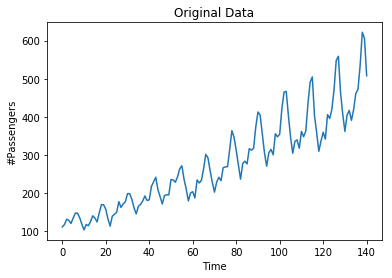

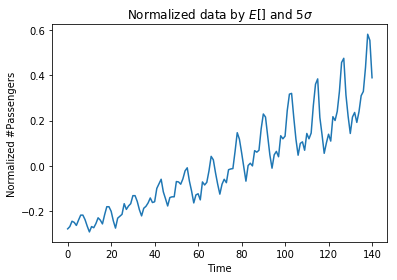

(128, 12, 1) (128,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 12, 1)             0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 10)                480       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


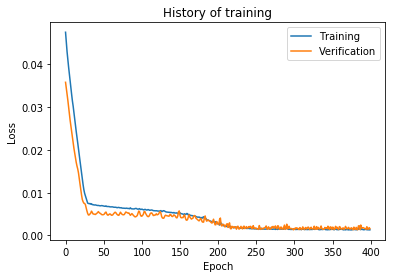

26/26 [==============================] - 0s 345us/step
Loss:  0.0016050926642492414


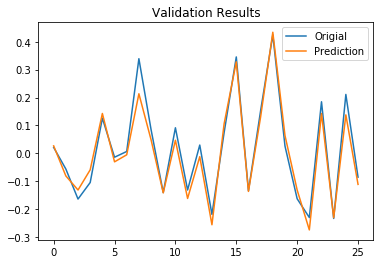

26/26 [==============================] - 0s 307us/step
Loss:  0.0016050926642492414
(26,) (26,)


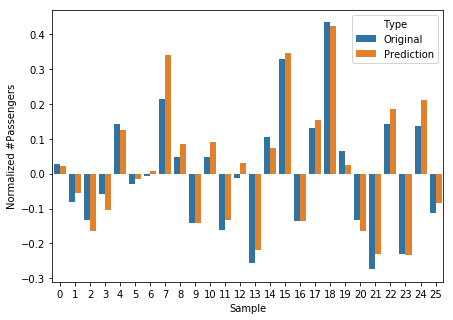

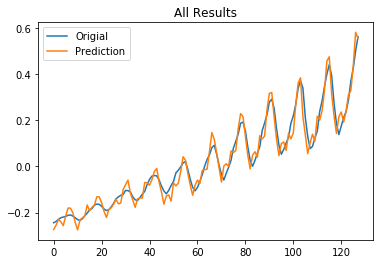

In [64]:
if __name__ == '__main__':
    main()